In [1]:
#!/usr/bin/env/python3

# Ganesh Arvapalli

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declare necessary constants

gmax_Na = 120
gmax_K = 36
gmax_L = 0.3
eNa_hh = 50    # -RT/nF ln(Q)
eK_hh = -77
eL_hh = -54.4
C = 1

In [3]:
# Declare relevant functions

alpha_n = lambda V: 0.01 * ((V + 55) / (1 - np.exp(-(V + 55) / 10)))
beta_n = lambda V: 0.125 * np.exp(-(V + 65)/80)
alpha_m = lambda V: 0.1 * ((V + 40) / (1 - np.exp(-(V+40) / 10)))
beta_m = lambda V: 4 * np.exp(-(V + 65) / 18)
alpha_h = lambda V: 0.07 * np.exp(-(V + 65) / 20)
beta_h = lambda V: 1.0 / (1 + np.exp(-(V + 35) / 10))

In [4]:
# Declare input current as list of numbers spaced at "dt" apart

duration = 30
dt = 0.001

I_in = np.zeros(1500)
I_in = np.append(I_in, -1 * np.ones(500))
I_in = np.append(I_in, np.zeros(int(duration/dt) - len(I_in)))

In [5]:
# Initial values

V_init = -70
a_n, a_m, a_h = alpha_n(V_init), alpha_m(V_init), alpha_h(V_init)
b_n, b_m, b_h = beta_n(V_init), beta_m(V_init), beta_h(V_init)
n = a_n / (a_n + b_n)
m = a_m / (a_m + b_m)
h = a_h / (a_h + b_h)
print("n_init", n, "m_init", m, "h_init", h)

In [6]:
V = np.zeros(np.shape(I_in))
V[0] = V_init

for i in range(len(I_in) - 1):  
    dn = dt * (alpha_n(V[i]) / (alpha_n(V[i]) + beta_n(V[i])) - n) * (alpha_n(V[i]) + beta_n(V[i]))
    dm = dt * (alpha_m(V[i]) / (alpha_m(V[i]) + beta_m(V[i])) - m) * (alpha_m(V[i]) + beta_m(V[i]))
    dh = dt * (alpha_h(V[i]) / (alpha_h(V[i]) + beta_h(V[i])) - h) * (alpha_h(V[i]) + beta_h(V[i]))

    n, m, h = n + dn, m + dm, h + dh
    
    I_Na = gmax_Na * (m**3) * h * (V[i] - eNa_hh)
    I_K = gmax_K * (n**4) * (V[i] - eK_hh)
    I_L = gmax_L * (V[i] - eL_hh)
    I_c = I_in[i] - I_Na - I_K - I_L
    
    dV = (1 / C) * I_c * dt
    V[i+1] = V[i] + dV


([<matplotlib.axis.XTick at 0x23b01e5f6a0>,
 <a list of 5 Text xticklabel objects>)

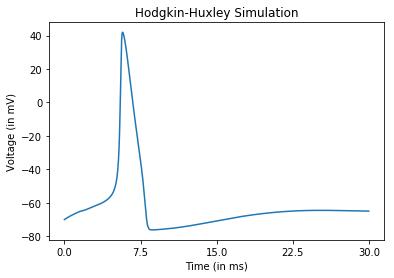

In [28]:
fig, ax = plt.figure(), plt.axes()
num_ticks = 6
ax.plot(V)
ax.set_title("Hodgkin-Huxley Simulation")
ax.set_xlabel("Time (in ms)")
ax.set_ylabel("Voltage (in mV)")
plt.xticks(np.linspace(0,duration/dt,num_ticks), np.linspace(0, duration/dt,num_ticks)*dt)

In [8]:
V

array([-70.        , -69.99595959, -69.99192092, ..., -64.96648516,
       -64.96657486, -64.96666452])